In [1]:
import numpy as np
import h5py
import json
import sys
sys.path.append('F:\Linux')
import illustris_python as il
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap


def xyline(x, y):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

# def LoadMergHist(simu, subhaloID):
#     '''
#     return subhalo's main progenitor and merger history with snapshot
#     '''
#     if simu == 'TNG':
#         ldir = '/Raid0/zhouzb/merg_data/tng_DiskMerTree/%d.json' % subhaloID
#     else:
#         ldir = '/Raid0/zhouzb/merg_data/il1_DiskMerTree/%d.json' % subhaloID
    
#     with open(ldir) as f:
#         data = json.load(f)
    
#     Main = np.array(data['Main'])
#     return dict(zip(Main[:, 0], Main[:, 1])), np.array(data['Mergers'])

def LoadMergHist(simu, subhaloID):
    '''
    return subhalo's main progenitor and merger history with snapshot
    '''
    if simu == 'TNG':
        ldir = 'f:/Linux/localRUN/tng_DiskMerTree/%d.json' % subhaloID
    else:
        ldir = 'f:/Linux/localRUN/il1_DiskMerTree/%d.json' % subhaloID
    
    with open(ldir) as f:
        data = json.load(f)
    
    Main = np.array(data['Main'])
    return dict(zip(Main[:, 0], Main[:, 1])), np.array(data['Mergers'])



snapshot = [99, 91, 84, 78, 72, 67, 59, 50, 40, 33]
Redshift = [0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0]



In [10]:
GasFraction = {}
for snap in snapshot:
    mas = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    GasFraction[snap] = Gf
    
    
barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy', allow_pickle=1)
A2list = np.load('f:/Linux/localRUN/tng_A2withRedshift.npy', allow_pickle=1).item()

b2b = np.load('F:/npy/tng_b2b.npy', allow_pickle=1)
b2no = np.load('F:/npy/tng_b2no.npy', allow_pickle=1)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


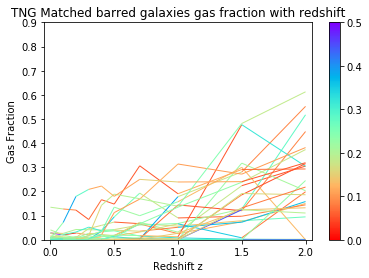

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
norm = plt.Normalize(0, 0.5)
ax.set_xlim(-0.05, 2.05)
ax.set_ylim(0, 0.9)
ax.set_xlabel('Redshift z')
ax.set_ylabel('Gas Fraction')
ax.set_title('TNG Matched barred galaxies gas fraction with redshift')

for subhaloID in b2b:
    prog = LoadMergHist('TNG', subhaloID)[0]
    GFlist = []
    A2 = A2list[subhaloID]
    for snapnum in snapshot:
        try:
            haloID = prog[snapnum]
        except:
            GFlist.append(-1)
            continue
        GFlist.append(GasFraction[snapnum][haloID])

    xaxis = []
    yaxis = []
    color = []
    for i in range(10):
        if GFlist[i] != -1:
            xaxis.append(Redshift[i])
            yaxis.append(GFlist[i])
            color.append(float(A2[i]))
    
    seg = xyline(xaxis, yaxis)
    lc = LineCollection(seg, cmap='rainbow_r', norm=norm)
    lc.set_array(np.array(color))
    lc.set_linewidth(1)
    line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)
plt.savefig('f:/Linux/local_result/Match/bar2bar/tng_barred_GF.png',dpi=400)